In [ ]:
# IMPORTS
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec  
sns.set(style='white')

# LOAD FUNCTIONS
%run useful_functions.ipynb

__Translations__

In [ ]:
df.head(3)

,ID,Codi_Districte_Educatiu,Nom_Districte_Educatiu,Curs,Sexe,Llar_BCN,ERFDbllp,Edat,amb_qui_vius,familia_altra_casa,...,t_deures,t_tv,t_esport,t_familia,t_airelliure,t_xarxes,t_videojocs,t_resrepos,d_drets,d_convencio
0,1,8,Nou Barris,6è,Nena,Sí,Barris rendes baixes,11,Visc amb la meva família,No,...,Cada dia,5 o 6 dies a la setmana,5 o 6 dies a la setmana,5 o 6 dies a la setmana,3 o 4 dies a la setmana,5 o 6 dies a la setmana,Algun dia al mes,1 o 2 dies a la setmana,Sí,Sí
1,2,8,Nou Barris,6è,Nen,Sí,Barris rendes intermèdies,11,Visc amb la meva família,Sí,...,Cada dia,Cada dia,1 o 2 dies a la setmana,Algun dia al mes,Algun dia al mes,3 o 4 dies a la setmana,1 o 2 dies a la setmana,1 o 2 dies a la setmana,Sí,No n'estic segur/a
2,3,8,Nou Barris,6è,Nena,Sí,Barris rendes baixes,11,Visc amb la meva família,No,...,Cada dia,5 o 6 dies a la setmana,Cada dia,Cada dia,3 o 4 dies a la setmana,3 o 4 dies a la setmana,1 o 2 dies a la setmana,Cada dia,No n'estic segur/a,Sí


In [ ]:
df_t.head(3)

,ID,Codi_Districte_Educatiu,Nom_Districte_Educatiu,Curs,Sexe,Llar_BCN,ERFDbllp,Edat,amb_qui_vius,familia_altra_casa,...,t_xarxes,t_videojocs,t_resrepos,d_drets,d_convencio,Població,RFD-mean,RFD-sumw,RFD-std,RFD-sem
0,1,8,Nou Barris,6è,Girl,Yes,Low-income neighborhoods,11,I live with my family,No,...,5 or 6 days a week,One day a month,1 or 2 days a week,Yes,Yes,166805,51.446154,55.011607,7.426261,2.059674
1,2,8,Nou Barris,6è,Boy,Yes,Intermediate income neighborhoods,11,I live with my family,Yes,...,3 or 4 days a week,1 or 2 days a week,1 or 2 days a week,Yes,I'm not sure,166805,51.446154,55.011607,7.426261,2.059674
2,3,8,Nou Barris,6è,Girl,Yes,Low-income neighborhoods,11,I live with my family,No,...,3 or 4 days a week,1 or 2 days a week,Every day,I'm not sure,Yes,166805,51.446154,55.011607,7.426261,2.059674


# 2. Exploratory analysis

Starting with the descriptive elements of the children surveyed, we are gonna asses the gender and age distribution. We will asses as well in which school grade they currently are, and where are they from originally.

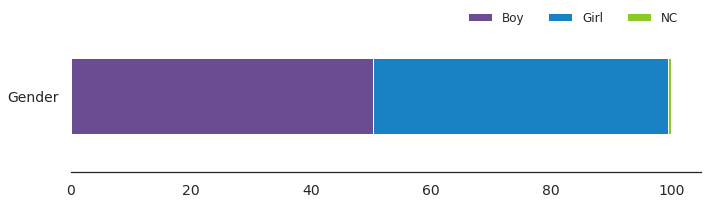

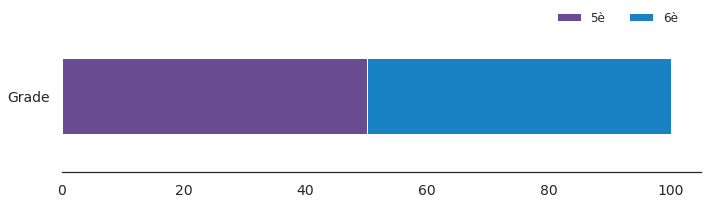

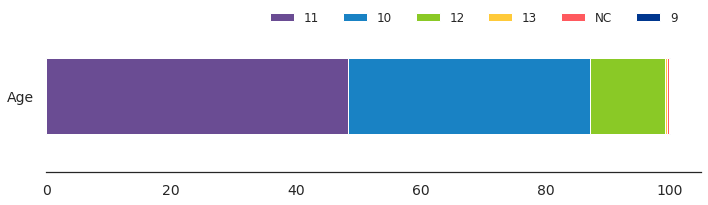

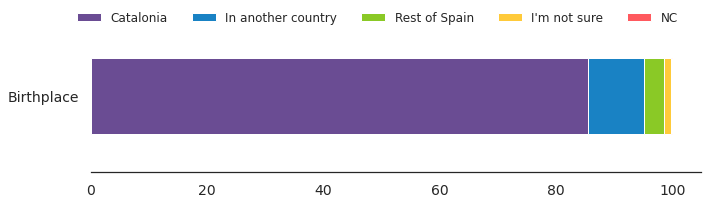

In [ ]:
sns.set(style='white')

colors_hex = ['#00378F', '#FF595E', '#FFCA3A', '#8AC926', '#1982C4', '#6A4C93']
import matplotlib.colors
colors = [matplotlib.colors.to_rgba(col) for col in colors_hex[::-1]]

exp_vars = ['Sexe', 'Curs', 'Edat', 'on_vas_niexer']
name_vars = ['Gender', 'Grade', 'Age', 'Birthplace']
for elem,lab in zip(exp_vars, name_vars):
    stacked_vars(df_t, elem, colors, lab, leg='top') # in useful functions

COMMENT - on distributions

Now let's look at the districs of the kids surveyed and let's compare it with the actual population from Barcelona:

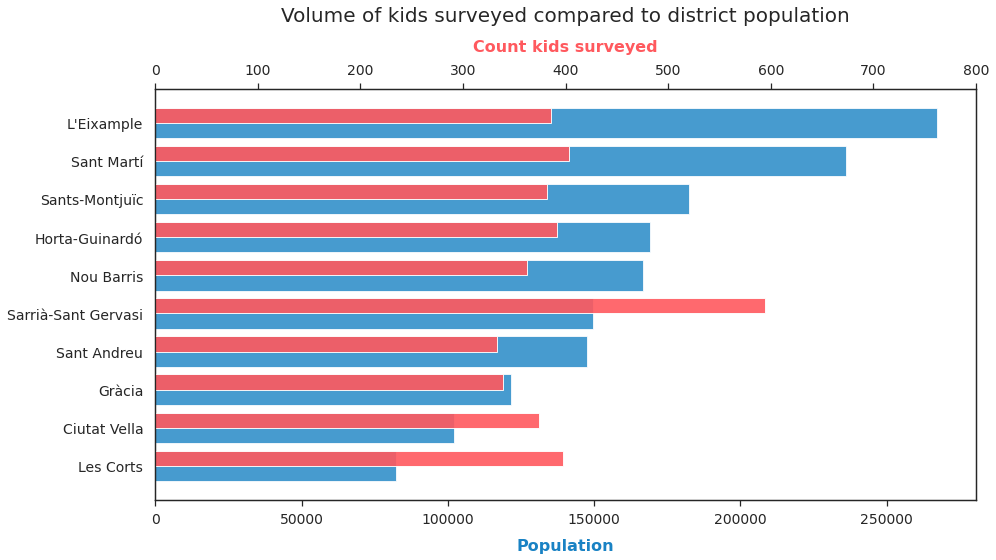

In [ ]:
# Getting POPULATION data by DISTRICT OPT 1
dist_name ='Nom_Districte_Educatiu'
df_POB = df_t.loc[:,[dist_name, 'Població']].drop_duplicates(keep='first',inplace=False).sort_values(by=['Població'])

# Number of kids surveyed by DISTRICT (sorted with POPULATION)
district_names = df_POB[dist_name].unique()
district_count = [(df_t[dist_name] == x).sum() for x in district_names]

fig, ax1 = plt.subplots(figsize=(14,8))
ax1.barh(df_POB.Nom_Districte_Educatiu, df_POB.Població, color=colors[1], alpha=0.8, height=0.8)
ax1.tick_params(labelsize=14, pad=6)

# Creating a secondary axis and plotting population
ax2 = ax1.twiny()
ax2.barh(district_names, district_count, color=colors[4], alpha=0.9, height=0.4, align='edge')
ax2.set_xlim([0, 800])
ax2.tick_params(labelsize=14, pad=6)

ax2.set_xlabel('Count kids surveyed', color=colors[4], size=16, labelpad = 12, fontweight ="bold")
ax1.set_xlabel('Population', color=colors[1], size=16, labelpad = 12,fontweight ="bold")
plt.title('Volume of kids surveyed compared to district population', fontsize=20, y=1.15)

plt.tight_layout()
plt.show()

In [ ]:
# Aggregating income and population values
file_path = '../data/2017_distribucio_territorial_renda_familiar.csv'
df_inc = pd.read_csv(file_path, sep=',')

# df_dist = df_inc.groupby(['Codi_Districte']).agg({'Població':'sum', 'Índex RFD Barcelona = 100':'mean'})
# df_t = df_t.join(df_dist, on='Codi_Districte_Educatiu')

In [ ]:
# print(min(district_count), max(district_count))
# print(min(df_t.Població), max(df_t.Població))

COMMENT - previous graph: not same distribution

An error was identifed in the average income columns from the survey `'ERFDbllp'`.   
Different Levels where aggregated to the same district, thus it was not possible to divide the district by a unqiue income level.  
It was necessary to include the information from the actual RFD income of the district on the same year, the infomration was indetifed in another dataset from  [BCN OpenData](https://upload.wikimedia.org/wikipedia/commons/a/ab/Barcelona_Barris_map.svg)

Show plot with discrepancies:

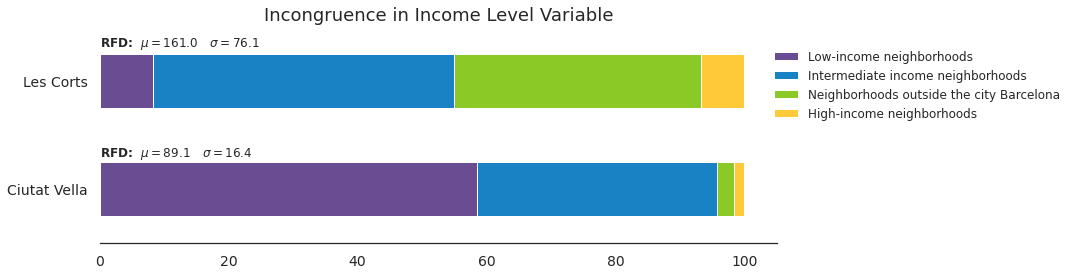

In [ ]:
# Evaluating Ciutat Vella and Les Corts Income levels
name_var='ERFDbllp'
ix_mean = 'RFD-mean'
ix_std = 'RFD-std'
noms = ['Ciutat Vella', 'Les Corts']

count1 = df_t.loc[df_t.Nom_Districte_Educatiu == noms[0]][name_var].value_counts(normalize=True)*100
piv_1 = count1.to_frame().T.rename(index={name_var: noms[0]})

count2 = df_t.loc[df_t.Nom_Districte_Educatiu == noms[1]][name_var].value_counts(normalize=True)*100
piv_2 = count2.to_frame().T.rename(index={name_var: noms[1]})

piv_ = piv_1.append(piv_2)
levels = piv_.shape[1]

piv_.plot.barh(stacked=True, figsize=(15,4), color = colors[:levels])
plt.tick_params(labelsize=14, pad=6)

plt.legend(bbox_to_anchor=(0.98,0.94), loc="upper left", frameon=False, fontsize='medium')
ax = plt.gca()
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.title('Incongruence in Income Level Variable', fontsize=18, y=1)

# Adding text box
ix_1_m = df_t.loc[df_t.Nom_Districte_Educatiu == noms[0]][ix_mean].unique()[0]
ix_1_s = df_t.loc[df_t.Nom_Districte_Educatiu == noms[0]][ix_std].unique()[0]
ix_2_m = df_t.loc[df_t.Nom_Districte_Educatiu == noms[1]][ix_mean].unique()[0]
ix_2_s = df_t.loc[df_t.Nom_Districte_Educatiu == noms[1]][ix_std].unique()[0]

textstr1 = 'RFD:  '+ '   '.join((r'$\mu= %.1f$' % (ix_1_m,), r'$\sigma= %.1f$' % (ix_1_s,)))
ax.text(0, 0.45, textstr1, transform=ax.transAxes, fontsize=12, fontweight ="bold",
        verticalalignment='top')

textstr2 = 'RFD:  '+ '   '.join((r'$\mu= %.1f$' % (ix_2_m,), r'$\sigma= %.1f$' % (ix_2_s,)))
ax.text(0, 0.96, textstr2, transform=ax.transAxes, fontsize=12, fontweight ="bold",
        verticalalignment='top')
        
plt.tight_layout()

In [ ]:
piv_

,Low-income neighborhoods,Intermediate income neighborhoods,Neighborhoods outside the city Barcelona,High-income neighborhoods
Ciutat Vella,58.556150,37.165775,2.673797,1.604278
Les Corts,8.312343,46.599496,38.287154,6.801008


Th stacked bars highlight a Clear incongurence. Rthe expactation would be that one district is descrived by one level, one color. And as a first look we can clearly see that we are not in front of a residual issue:
> Ciutat Vella with  60% low income and almost 40% Intermdiate  
> Les Corts marked in almost 40% of the cases as a neighborhood outside of Barcelona. Which is not.

The error comes from the aggregation of neighbourhoods to districts. Since we don't have the nieghborhoods in the data--set we can use an external source and calculate teh aggregated RFD index


In [ ]:
df_t.loc[:,['Nom_Districte_Educatiu','RFD-std','RFD-sem']].drop_duplicates(keep='first',inplace=False)

,Nom_Districte_Educatiu,RFD-std,RFD-sem
0,Nou Barris,7.426261,2.059674
41,Ciutat Vella,16.388487,8.194243
74,Sant Martí,35.919633,11.358785
222,Horta-Guinardó,11.814406,3.562177
391,Sarrià-Sant Gervasi,28.884713,11.792135
603,Sants-Montjuïc,18.687352,6.606977
923,Sant Andreu,11.682853,4.415703
1138,Les Corts,76.092312,43.931917
1435,Gràcia,9.988243,4.466878
2212,L'Eixample,29.114303,11.885865


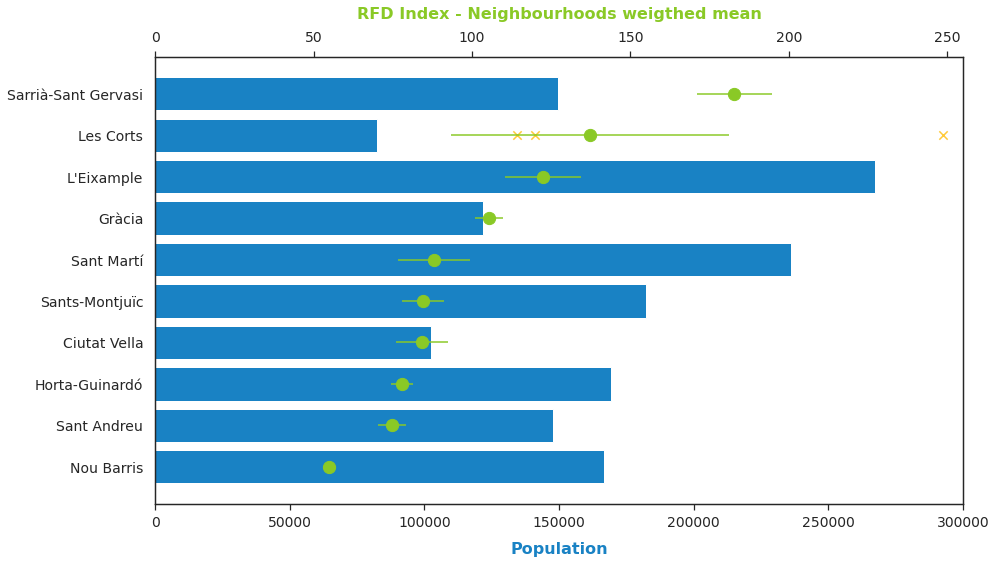

In [ ]:
# RFD index TEST 1:
ix_sem = 'RFD-sem'
ix_sw = 'RFD-sumw'
df_RFD = df_t.loc[:,[dist_name, ix_sw, ix_std, ix_sem,'Població']].drop_duplicates(keep='first',inplace=False).sort_values(by=[ix_sw])

fig, ax1 = plt.subplots(figsize=(14,8))
ax1.barh(df_RFD[dist_name], df_RFD['Població'], color=colors[1])
ax1.tick_params(labelsize=14, pad=6)
ax1.set_xlim([0,300000])

# Creating a secondary axis and plotting population
ax2 = ax1.twiny()
ax2.scatter(y=df_RFD[dist_name], x= df_RFD[ix_sw], color=colors[2], s=150, marker="o")
ax2.errorbar(y=df_RFD[dist_name], x= df_RFD[ix_sw], xerr=df_RFD[ix_sem], linestyle="None", color=colors[2])
ax2.set_xlim([0,255])
ax2.tick_params(labelsize=14, pad=6)

corts = df_inc.loc[df_inc.Nom_Districte == 'Les Corts'].loc[:,['Nom_Districte', 'Índex RFD Barcelona = 100']]
ax2.scatter(y=corts['Nom_Districte'], x= corts['Índex RFD Barcelona = 100'], color=colors[3], s=70, marker="x")

ax1.set_xlabel('Population', size=16, labelpad = 12, color=colors[1], fontweight ="bold")
ax2.set_xlabel('RFD Index - Neighbourhoods weigthed mean', size=16, labelpad = 12, color=colors[2], fontweight ="bold")
# plt.title('RFD Index by District', fontsize=20, y=1.15)
plt.tight_layout()
plt.show()

Les Corts - deviation coming from small number of neighborhoods very different between them: Pedralbes vs La Maternitat and Les corts (barri) 

In [ ]:
corts = df_inc.loc[df_inc.Nom_Districte == 'Les Corts'].loc[:,['Nom_Districte', 'Nom_Barri','Població', 'Índex RFD Barcelona = 100']]
corts

,Nom_Districte,Nom_Barri,Població,Índex RFD Barcelona = 100
18,Les Corts,les Corts,46104,120.0
19,Les Corts,la Maternitat i Sant Ramon,23980,114.2
20,Les Corts,Pedralbes,12117,248.8


How to create divisons?

In [ ]:
#------------------------------------------------------------------------
# CLUSTERING TESTS 

# >> 1 . Mean and STD
from sklearn.cluster import KMeans

X = df_RFD.loc[:,[dist_name, ix_var, ix_std,]].set_index(dist_name)
X_norm = (X - np.mean(X))/np.std(X) # should it be standardized?
X_norm.describe()

NameError: name 'ix_var' is not defined

In [ ]:
K = 3
k = KMeans(K, init = 'k-means++', random_state = 1)
k.fit(X_norm)
X_norm['k3_means_cluster'] = k.fit_predict(X_norm)
# X_norm['k3_means_cluster'] = X_norm['k3_means_cluster'] + 1

In [ ]:
X['k3_cluster'] = X_norm.k3_means_cluster
X.groupby('k3_cluster').mean().sort_values('RFD-mean').round(2)

,RFD-mean,RFD-std
k3_cluster,,
1,79.39,12.66
0,132.82,31.31
2,161.00,76.09


In [ ]:
X = X.reset_index().sort_values('RFD-mean')
X

,Nom_Districte_Educatiu,RFD-mean,RFD-std,k3_cluster
0,Nou Barris,51.446154,7.426261,1
1,Sant Andreu,70.371429,11.682853,1
2,Sants-Montjuïc,79.050000,18.687352,1
3,Horta-Guinardó,82.527273,11.814406,1
4,Ciutat Vella,89.075000,16.388487,1
5,Sant Martí,96.700000,35.919633,0
6,Gràcia,103.900000,9.988243,1
7,L'Eixample,122.633333,29.114303,0
8,Les Corts,161.000000,76.092312,2
9,Sarrià-Sant Gervasi,179.133333,28.884713,0


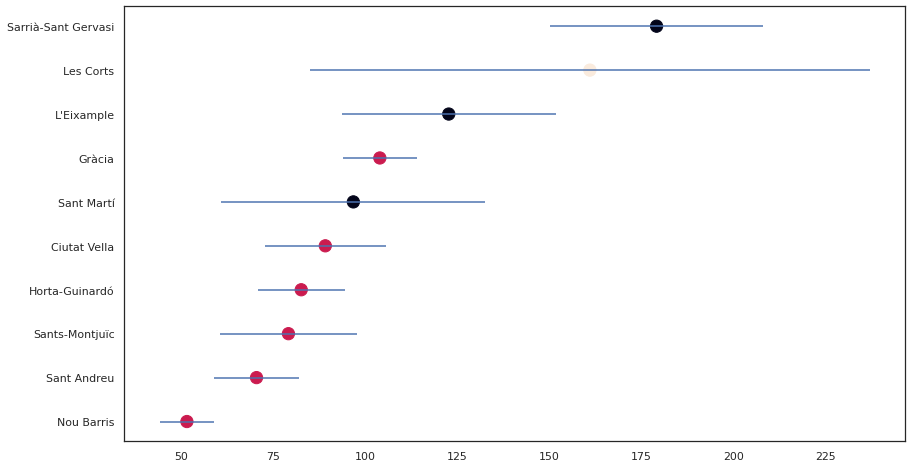

In [ ]:
fig, ax1 = plt.subplots(figsize=(14,8))
cdict= {0:'b',1:'g',3:'r'}
ax1.scatter(y=X[dist_name], x= X[ix_var], c = X['k3_cluster'], s=150, marker="o")
ax1.errorbar(y=X[dist_name], x= X[ix_var], xerr=X[ix_std],linestyle="None")
plt.show()

In [ ]:
# >> 2 - Clustering with POPULATION AND RFD
X = df_RFD.loc[:,[dist_name, ix_var, ix_std,'Population']].set_index(dist_name)
X.corr()

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['Population'], dtype='object'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [ ]:
X_norm = (X - np.mean(X))/np.std(X)
X_norm.describe()

,RFD,Població
count,1.000000e+01,1.000000e+01
mean,-1.776357e-16,-1.804112e-16
std,1.054093e+00,1.054093e+00
min,-1.369580e+00,-1.491930e+00
25%,-6.216293e-01,-6.393284e-01
50%,-2.809731e-01,-7.884244e-02
75%,3.773841e-01,3.074144e-01
max,1.984586e+00,1.944409e+00


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
K = 3
k = KMeans(K, init = 'k-means++', random_state = 1)
k.fit(X_norm)
X_norm['k3_means_cluster'] = k.fit_predict(X_norm)
X_norm['k3_means_cluster'] = X_norm['k3_means_cluster'] + 1

In [ ]:
X['k3_cluster'] = X_norm.k3_means_cluster
X.groupby('k3_cluster').mean().sort_values('RFD').round(2)

,RFD,Població
k3_cluster,,
2,79.39,148309.17
1,109.67,251673.50
3,170.07,115967.50


In [ ]:
fig, ax1 = plt.subplots(figsize=(14,8))
cdict= {0:'b',1:'g',3:'r'}
ax1.scatter(y=X[dist_name], x= X[ix_var], c = X['k3_cluster'], s=150, marker="o")
ax1.errorbar(y=X[dist_name], x= X[ix_var], xerr=X[ix_std],linestyle="None")
plt.show()

-----------

# SUPERSSEEDED:

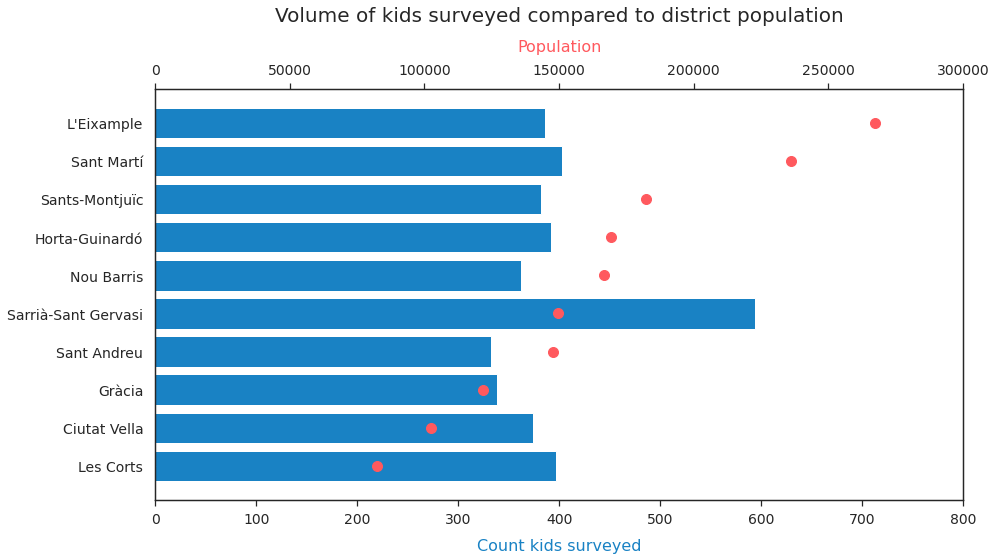

In [ ]:
# Getting POPULATION data by DISTRICT OPT 2
dist_name ='Nom_Districte_Educatiu'
df_POB = df_t.loc[:,[dist_name, 'Població']].drop_duplicates(keep='first',inplace=False).sort_values(by=['Població'])

# Number of kids surveyed by DISTRICT (sorted with POPULATION)
district_names = df_POB[dist_name].unique()
district_count = [(df_t[dist_name] == x).sum() for x in district_names]

fig, ax1 = plt.subplots(figsize=(14,8))
ax1.barh(district_names, district_count, color=colors[1])
plt.tick_params(labelsize=14, pad=6)
ax1.set_xlim([0, 800])

# Creating a secondary axis and plotting population
ax2 = ax1.twiny()
ax2.scatter(x=df_POB.Població, y=df_POB.Nom_Districte_Educatiu, color=colors[4], s=100, marker="o")
ax2.scatter(y='Les Corts', x=0, color=colors[1], s=1)
ax2.set_xlim([0, 300000])
plt.tick_params(labelsize=14, pad=6)

ax1.set_xlabel('Count kids surveyed', color=colors[1], size=16, labelpad = 12)
ax2.set_xlabel('Population', color=colors[4], size=16, labelpad = 12)
plt.title('Volume of kids surveyed compared to district population', fontsize=20, y=1.15)

plt.tight_layout()
plt.show()

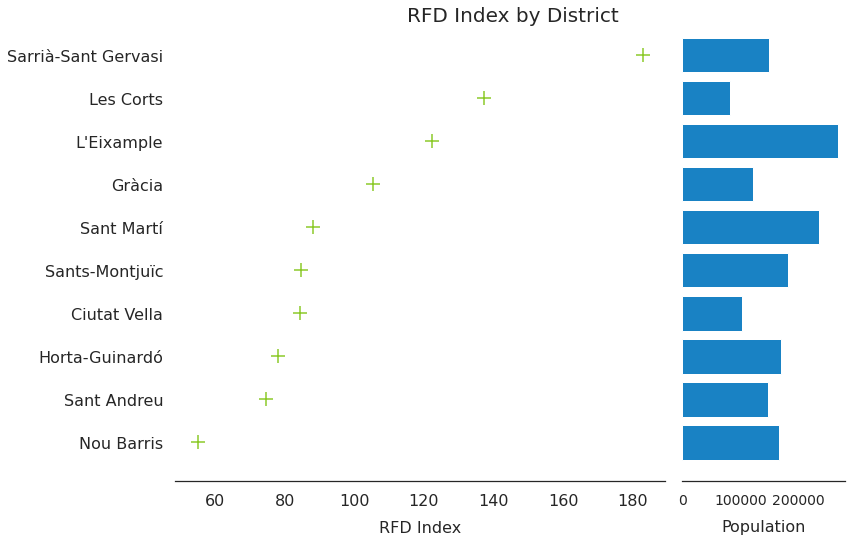

In [ ]:
# RFD index TEST 2:
df_RFD = df_t.loc[:,[dist_name, ix_sw]].drop_duplicates(keep='first',inplace=False).sort_values(by=[ix_sw])
df_RFD = df_t.loc[:,[dist_name, ix_sw, 'Població']].drop_duplicates(keep='first',inplace=False).sort_values(by=[ix_sw])

fig, ax = plt.subplots(figsize=(12,8))
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])

ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1], sharey=ax1)
plt.setp(ax2.get_yticklabels(), visible=False)

ax1.scatter(y=df_RFD[dist_name], x= df_RFD[ix_sw], color=colors[2], s=200, marker="+")
ax1.tick_params(labelsize=16, pad=6)

ax2.barh(df_RFD[dist_name], df_RFD['Població'], color=colors[1])
ax2.tick_params(labelsize=14, pad=6)

for ax in [ax1,ax2]: 
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)

ax1.set_xlabel('RFD Index', size=16, labelpad = 12)
ax2.set_xlabel('Population', size=16, labelpad = 12)
plt.suptitle('RFD Index by District', fontsize=20, y=0.94, x=0.6)
plt.tight_layout()
plt.show()

In [ ]:
# df_inc.groupby(['Codi_Districte', 'Nom_Districte']).agg({'Població':'sum', 'Índex RFD Barcelona = 100':'mean'}).reset_index()

df_INC = df_t.loc[:,['Codi_Districte_Educatiu', 'Nom_Districte_Educatiu', 'ERFDbllp', 'Índex RFD Barcelona = 100']]
df_dup = df_INC.drop_duplicates(keep='first',inplace=False).sort_values(by=['Codi_Districte_Educatiu'])
df_dup


KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['Índex RFD Barcelona = 100'], dtype='object'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

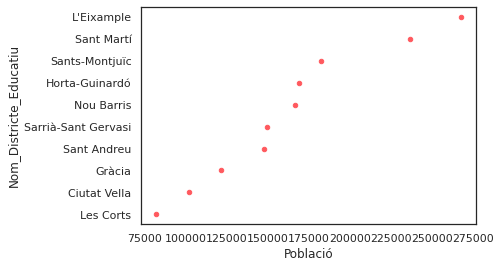

In [ ]:
df_POB = df_t.loc[:,['Nom_Districte_Educatiu', 'Població']].drop_duplicates(keep='first',inplace=False).sort_values(by=['Població'])
df_POB.plot(kind='scatter',x='Població', y='Nom_Districte_Educatiu', color=colors[4])
plt.show()

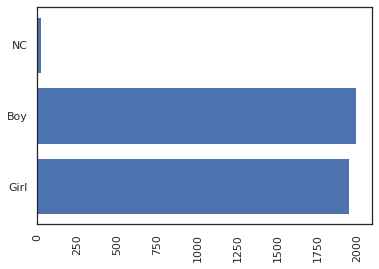

In [ ]:
## First looking at the distribution of the answers:
sex_names = df_t['Sexe'].unique()
sex_count = [(df_t['Sexe'] == x).sum() for x in sex_names]

plt.barh(sex_names, sex_count)
plt.xticks(rotation=90)
plt.show()

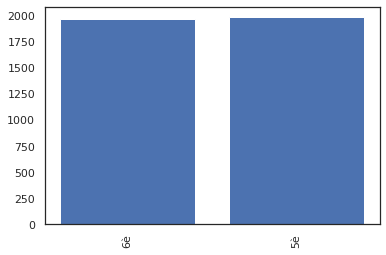

In [ ]:
## First looking at the distribution of the answers:
grade_names = df['Curs'].unique()
grade_count = [(df['Curs'] == x).sum() for x in grade_names]

plt.bar(grade_names, grade_count)
plt.xticks(rotation=90)
plt.show()

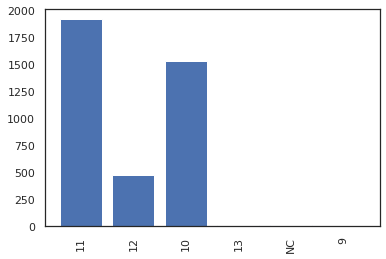

In [ ]:
## First looking at the distribution of the answers:
edat_names = df['Edat'].unique()
edat_count = [(df['Edat'] == x).sum() for x in edat_names]

plt.bar(edat_names, edat_count)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# cols = ['Nom_Districte_Educatiu', 'Sexe']
# d_gen = df[cols].copy()
# dummy_gen = pd.get_dummies(d_gen['Sexe'])
# d_gen = d_gen.drop('Sexe', 1)
# d_gen = pd.concat([d_gen, dummy_gen],axis=1)
# d_gen = d_gen.groupby['Nom_Districte_Educatiu'].sum()
# d_gen.info()
# # d_gen


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5cb1a2c0-2f56-40d6-8008-fedeaf8b6a17' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>